In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings

from tensorflow.keras.layers import Input, Embedding, Flatten, Dot, Dense, Concatenate
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('User_Item_Rating.csv')

In [3]:
number_of_unique_user = len(data.User.unique())
number_of_unique_item_id = len(data.Item.unique())
print(number_of_unique_user, number_of_unique_item_id)

10000 6260


In [4]:
# layer 쌓기

item_input = Input(shape=(1, ), name='item_input_layer')
user_input = Input(shape=(1, ), name='user_input_layer')

item_embedding_layer = Embedding(number_of_unique_item_id + 1, 8, name='item_embedding_layer')
user_embedding_layer = Embedding(number_of_unique_user + 1, 8, name='user_embedding_layer')

item_vector_layer = Flatten(name='item_vector_layer')
user_vector_layer = Flatten(name='user_vector_layer')

concate_layer = Concatenate()

dense_layer1 = Dense(128, activation='relu')
dense_layer2 = Dense(32, activation='relu')

result_layer = Dense(1)

In [5]:
# 쌓기
item_embedding = item_embedding_layer(item_input)
user_embedding = user_embedding_layer(user_input)

item_vector = item_vector_layer(item_embedding)
user_vector = user_vector_layer(user_embedding)

concat = concate_layer([item_vector, user_vector])
dense1 = dense_layer1(concat)
dense2 = dense_layer2(dense1)

result = result_layer(dense2)

model = Model(inputs=[user_input, item_input], outputs=result)

In [6]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 item_input_layer (InputLayer)  [(None, 1)]          0           []                               
                                                                                                  
 user_input_layer (InputLayer)  [(None, 1)]          0           []                               
                                                                                                  
 item_embedding_layer (Embeddin  (None, 1, 8)        50088       ['item_input_layer[0][0]']       
 g)                                                                                               
                                                                                                  
 user_embedding_layer (Embeddin  (None, 1, 8)        80008       ['user_input_layer[0][0]']   

In [7]:
model.compile(loss = 'mse', optimizer='adam', metrics=['mse'])

In [8]:
data

,Unnamed: 0,User,Item,Rating
0,28,1,809,3
1,16,1,1695,5
2,20,1,1821,1
3,5,1,1985,2
4,1,1,2073,5
...,...,...,...,...
270821,270821,10000,2748,4
270822,270818,10000,2751,4
270823,270816,10000,3339,2
270824,270817,10000,4208,2


In [9]:
history = model.fit([data.User, data.Item], data.Rating, epochs=8, verbose=1)

Epoch 1/8
8464/8464 [==============================] - 15s 2ms/step - loss: 2.0529 - mse: 2.0529
Epoch 2/8
8464/8464 [==============================] - 15s 2ms/step - loss: 2.0085 - mse: 2.0085
Epoch 3/8
8464/8464 [==============================] - 16s 2ms/step - loss: 1.9722 - mse: 1.9722
Epoch 4/8
8464/8464 [==============================] - 15s 2ms/step - loss: 1.8871 - mse: 1.8871
Epoch 5/8
8464/8464 [==============================] - 14s 2ms/step - loss: 1.7548 - mse: 1.7548
Epoch 6/8
8464/8464 [==============================] - 15s 2ms/step - loss: 1.6302 - mse: 1.6302
Epoch 7/8
8464/8464 [==============================] - 16s 2ms/step - loss: 1.5246 - mse: 1.5246
Epoch 8/8
8464/8464 [==============================] - 14s 2ms/step - loss: 1.4391 - mse: 1.4391


Text(0, 0.5, 'training error')

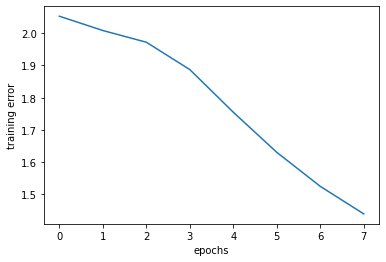

In [10]:
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.ylabel('training error')

In [11]:
model.evaluate([data.User, data.Item], data.Rating)

8464/8464 [==============================] - 6s 733us/step - loss: 1.2537 - mse: 1.2537


[1.2536548376083374, 1.2536548376083374]

In [12]:
predictions = model.predict([np.full(6260,7777,dtype = np.int32), np.arange(1,6261)])

196/196 [==============================] - 0s 737us/step


In [13]:
recommended_item_ids = (-predictions.reshape(6260,)).argsort()
for i in recommended_item_ids:
    print(str(i)+" : "+str(predictions[i]))

235 : [5.148973]
1714 : [4.740287]
3116 : [4.674568]
1949 : [4.5868816]
2049 : [4.535413]
2113 : [4.5349717]
1018 : [4.4936934]
2546 : [4.4755383]
1314 : [4.4637017]
4091 : [4.4616327]
4040 : [4.4613266]
3825 : [4.4602666]
3870 : [4.436051]
2685 : [4.4201097]
1456 : [4.3917227]
625 : [4.3805947]
4094 : [4.37966]
5873 : [4.3787165]
6030 : [4.377317]
3885 : [4.3566]
1540 : [4.3565526]
5780 : [4.343578]
5809 : [4.342702]
5466 : [4.3265147]
5275 : [4.323681]
856 : [4.3209896]
1309 : [4.3209414]
2439 : [4.3171544]
3820 : [4.311756]
565 : [4.3059454]
711 : [4.2963896]
5769 : [4.290495]
4470 : [4.284461]
2249 : [4.280778]
4874 : [4.278673]
5004 : [4.2766676]
3674 : [4.26806]
3092 : [4.263782]
719 : [4.2623954]
793 : [4.2551103]
4641 : [4.24359]
5698 : [4.228094]
1793 : [4.2252674]
4407 : [4.223423]
6052 : [4.2234135]
831 : [4.218014]
2240 : [4.2140927]
3395 : [4.207659]
3502 : [4.207178]
2430 : [4.2068768]
5557 : [4.2049255]
360 : [4.202034]
6112 : [4.1988826]
4870 : [4.1979017]
652 : [4.1971

4859 : [3.5604928]
2498 : [3.5591927]
4956 : [3.558589]
1034 : [3.5578575]
4389 : [3.5577152]
4725 : [3.5575778]
4308 : [3.5565414]
4401 : [3.5562334]
1914 : [3.55605]
734 : [3.555789]
994 : [3.5542455]
3971 : [3.5539382]
4427 : [3.5539343]
5975 : [3.553919]
2348 : [3.5527444]
4034 : [3.5526705]
1424 : [3.550967]
2273 : [3.5509408]
919 : [3.5504053]
1940 : [3.5499468]
5486 : [3.5487256]
4967 : [3.5486631]
3063 : [3.547621]
5615 : [3.546527]
3880 : [3.5461597]
1496 : [3.545516]
3978 : [3.5450215]
3917 : [3.544325]
470 : [3.5438547]
4938 : [3.543245]
6011 : [3.5424776]
2147 : [3.5420754]
4656 : [3.5416875]
4714 : [3.5411167]
6170 : [3.5405204]
4810 : [3.5399084]
3108 : [3.539826]
1345 : [3.5391684]
3035 : [3.5387964]
4177 : [3.5385687]
5409 : [3.5373275]
3872 : [3.5368836]
2088 : [3.5363746]
4534 : [3.5357287]
34 : [3.5354683]
1277 : [3.5351548]
4363 : [3.5351107]
1112 : [3.532833]
2248 : [3.5321236]
3802 : [3.531981]
1122 : [3.5311809]
5142 : [3.5304585]
2105 : [3.530448]
3625 : [3.5300

4774 : [3.2086222]
636 : [3.2084708]
2992 : [3.2082467]
6063 : [3.2069855]
5055 : [3.206829]
821 : [3.2067008]
1422 : [3.206594]
4129 : [3.206147]
5608 : [3.2060487]
170 : [3.2059932]
5917 : [3.2056527]
764 : [3.2055821]
1518 : [3.2053928]
5059 : [3.2046344]
2250 : [3.2035205]
4001 : [3.2032433]
274 : [3.2029395]
4266 : [3.20259]
5479 : [3.2025323]
1740 : [3.2025008]
920 : [3.2018502]
1905 : [3.2016664]
4495 : [3.2015646]
3255 : [3.20156]
2404 : [3.2014008]
1498 : [3.2010572]
2905 : [3.2005732]
968 : [3.2004652]
4767 : [3.200286]
5811 : [3.2001767]
160 : [3.2000973]
6000 : [3.1994743]
847 : [3.198925]
5265 : [3.1984115]
5512 : [3.1981194]
2243 : [3.1978545]
6061 : [3.197042]
319 : [3.1963274]
1706 : [3.1963189]
4028 : [3.1960745]
3023 : [3.1959374]
1965 : [3.1959305]
2698 : [3.1951356]
1641 : [3.194312]
5243 : [3.194178]
1436 : [3.194068]
699 : [3.193947]
1651 : [3.1935716]
2669 : [3.1919124]
248 : [3.1914144]
1762 : [3.1913753]
1007 : [3.1913743]
4281 : [3.1912532]
1435 : [3.1909838]


3529 : [3.031947]
932 : [3.0319355]
5902 : [3.0316544]
5029 : [3.0307684]
4358 : [3.0305676]
4255 : [3.0305648]
3119 : [3.0298424]
3462 : [3.029623]
2354 : [3.0295196]
986 : [3.0295148]
3047 : [3.029456]
5220 : [3.0294023]
6043 : [3.0293498]
441 : [3.029303]
3041 : [3.0290656]
1135 : [3.0289698]
3988 : [3.0288887]
5226 : [3.0285082]
4349 : [3.0281024]
1898 : [3.0277917]
4514 : [3.027749]
5767 : [3.0276666]
1538 : [3.0276604]
4617 : [3.027274]
5537 : [3.0271719]
3441 : [3.0271409]
606 : [3.0270133]
4202 : [3.0268192]
5896 : [3.0267708]
4124 : [3.0265055]
4614 : [3.026475]
3183 : [3.0261564]
3227 : [3.0261064]
6135 : [3.0257783]
4572 : [3.0257695]
3230 : [3.0257103]
5128 : [3.025609]
4910 : [3.0255113]
48 : [3.0254896]
4002 : [3.0248523]
3851 : [3.0246708]
2692 : [3.0245283]
4210 : [3.0244126]
4806 : [3.024101]
468 : [3.024043]
781 : [3.0231001]
4346 : [3.0226321]
1069 : [3.0218573]
3810 : [3.0217304]
2972 : [3.0213165]
5398 : [3.0211008]
3317 : [3.0210783]
1308 : [3.0206273]
2626 : [3.0

970 : [2.7889624]
5469 : [2.788495]
572 : [2.7881393]
5373 : [2.788001]
1499 : [2.7878637]
6207 : [2.7871675]
1348 : [2.787014]
4306 : [2.7869678]
2945 : [2.78683]
5937 : [2.786773]
6056 : [2.786745]
186 : [2.7865481]
5010 : [2.7864065]
989 : [2.7857084]
5594 : [2.7850528]
2136 : [2.7848516]
1615 : [2.784531]
5026 : [2.7844691]
3039 : [2.7843041]
162 : [2.784103]
1110 : [2.7840304]
5244 : [2.783663]
463 : [2.7834816]
1567 : [2.7826061]
5808 : [2.7825918]
5994 : [2.7824426]
4290 : [2.7817693]
5728 : [2.7815163]
1686 : [2.781499]
1216 : [2.7811544]
4006 : [2.7809505]
5732 : [2.7808733]
6218 : [2.7807448]
5576 : [2.7802227]
2655 : [2.780137]
3868 : [2.7799113]
2487 : [2.779732]
2362 : [2.7795548]
5255 : [2.7792597]
2557 : [2.7792556]
944 : [2.7779486]
1450 : [2.777945]
2929 : [2.7774432]
5545 : [2.7773738]
921 : [2.7773604]
3144 : [2.7772985]
1899 : [2.7772326]
5057 : [2.7769842]
4084 : [2.7768145]
1674 : [2.7764225]
758 : [2.7762864]
2159 : [2.7752004]
437 : [2.77519]
2550 : [2.7750292]


1703 : [2.5942674]
779 : [2.5942452]
1961 : [2.5930505]
2989 : [2.5925405]
4593 : [2.5924761]
5510 : [2.5924294]
1690 : [2.592153]
5759 : [2.5919242]
2981 : [2.59153]
2023 : [2.591521]
175 : [2.5914164]
6152 : [2.5908563]
3224 : [2.590218]
4525 : [2.589153]
4355 : [2.5890684]
5637 : [2.5889523]
3552 : [2.588902]
2078 : [2.588829]
4876 : [2.588583]
4025 : [2.5883834]
5124 : [2.5882535]
2644 : [2.5880866]
2668 : [2.5880742]
2727 : [2.5878887]
1623 : [2.5873122]
5532 : [2.5872943]
5993 : [2.5872042]
5660 : [2.5865383]
5906 : [2.5858493]
775 : [2.5857866]
2164 : [2.5857642]
4794 : [2.5856676]
3572 : [2.5852454]
5963 : [2.584888]
5628 : [2.584732]
3323 : [2.5843167]
4169 : [2.5840158]
148 : [2.5837348]
2758 : [2.583685]
4418 : [2.5835447]
5847 : [2.5828097]
498 : [2.582149]
5008 : [2.5818295]
3273 : [2.5817747]
4941 : [2.5817473]
4991 : [2.5811386]
3881 : [2.5809822]
1621 : [2.5809066]
3033 : [2.580895]
4638 : [2.5808725]
4435 : [2.58013]
3952 : [2.5797725]
5368 : [2.5797086]
5498 : [2.5792

158 : [2.2965994]
3000 : [2.2965615]
5476 : [2.2961445]
1280 : [2.29569]
2677 : [2.2955341]
5276 : [2.294768]
3812 : [2.2947392]
5156 : [2.294391]
1885 : [2.2941213]
2740 : [2.293766]
5774 : [2.2936778]
2285 : [2.2931042]
566 : [2.2930925]
60 : [2.2930837]
1982 : [2.292995]
3123 : [2.2928605]
2416 : [2.2923646]
183 : [2.2918878]
2082 : [2.2917366]
1926 : [2.2910478]
995 : [2.2909484]
2506 : [2.2908509]
2415 : [2.2908332]
404 : [2.2906518]
6109 : [2.2905538]
4955 : [2.2900395]
1962 : [2.2900229]
348 : [2.289774]
1781 : [2.2897327]
409 : [2.2893128]
6101 : [2.289108]
2495 : [2.28897]
1193 : [2.2886977]
5647 : [2.2884407]
3838 : [2.2876234]
3212 : [2.2869985]
2122 : [2.2868762]
5650 : [2.2868004]
391 : [2.286509]
1484 : [2.2864375]
5535 : [2.2864034]
2845 : [2.286346]
4459 : [2.285674]
5534 : [2.2847238]
3575 : [2.2840219]
2952 : [2.283763]
1148 : [2.2836351]
6081 : [2.2835827]
6028 : [2.2834735]
3342 : [2.2833507]
1826 : [2.2831383]
2134 : [2.283081]
5073 : [2.2830095]
238 : [2.2817435]


4566 : [2.065475]
3933 : [2.0647433]
1055 : [2.0631723]
1610 : [2.0624397]
3832 : [2.062039]
6206 : [2.0618572]
6010 : [2.0615656]
5546 : [2.0614414]
4899 : [2.0612125]
6029 : [2.060656]
4686 : [2.0602849]
5296 : [2.060061]
1536 : [2.0595217]
824 : [2.0582943]
2594 : [2.0575433]
819 : [2.0569625]
2208 : [2.0560148]
2526 : [2.0553179]
4379 : [2.0551577]
3741 : [2.0540204]
4755 : [2.0539594]
4958 : [2.0533237]
332 : [2.0532794]
2787 : [2.0525699]
2683 : [2.0524707]
4335 : [2.0524697]
4683 : [2.0522532]
1414 : [2.0519795]
1133 : [2.0518188]
3510 : [2.051591]
5799 : [2.0512757]
2658 : [2.0511327]
4630 : [2.0510898]
6257 : [2.050956]
5897 : [2.0506334]
443 : [2.049959]
3925 : [2.0497036]
1724 : [2.0494137]
5643 : [2.0493264]
5909 : [2.049117]
436 : [2.0486312]
5866 : [2.048502]
517 : [2.048355]
1912 : [2.047933]
250 : [2.047622]
5468 : [2.047564]
3532 : [2.0469284]
929 : [2.046445]
2011 : [2.0458598]
4207 : [2.0446942]
5626 : [2.0446835]
3546 : [2.0445352]
6009 : [2.044346]
1379 : [2.043658

4515 : [1.3762476]
4612 : [1.3738723]
5741 : [1.372234]
3747 : [1.37128]
2632 : [1.3669887]
1103 : [1.366105]
2986 : [1.3559308]
55 : [1.3547828]
3302 : [1.3462522]
2666 : [1.340788]
1642 : [1.3349212]
4061 : [1.329174]
6256 : [1.3256123]
592 : [1.3169794]
204 : [1.3094397]
4797 : [1.284909]
270 : [1.2801833]
1733 : [1.2774955]
4739 : [1.2696722]
3075 : [1.2523767]
1673 : [1.2508079]
2024 : [1.2412016]
2236 : [1.2333302]
6093 : [1.2330792]
5544 : [1.2296891]
1754 : [1.2236717]
2762 : [1.2219052]
4729 : [1.209163]
6080 : [1.1894106]
2124 : [1.1816123]
5338 : [1.1751422]
5134 : [1.1722829]
3997 : [1.1673753]
3900 : [1.1652238]
2310 : [1.1487974]
1234 : [1.1316161]
741 : [1.1242342]
5593 : [1.1142853]
4218 : [1.1088821]
3662 : [1.0827451]
210 : [0.97281206]
156 : [0.93665797]
4953 : [0.92173517]


In [14]:
model.save('ALGo.h5')